In [2]:
from IPython import get_ipython
get_ipython().run_line_magic("reset","-f")

from PyPackageJonas import *

figures_path = "C:/Users/jonas/Git/Analysis-of-Production-flow-systems-with-focus-on-industry/Latex Thesis/figures/"


In [3]:
X = np.array([1,25,40,83,123,256,1,27,49,84,126,257,1,27,49,84,129,311,5,30,54,84,134,314,7,30,56,90,144,322,8,31,56,91,147,369,8,31,62,92,153,415,13,32,63,93,163,573,14,34,65,93,167,609,14,35,65,103,175,640,17,36,67,103,228,737,18,37,75,111,231,21,38,76,112,235,21,39,79,119,242,22,39,82,122,256])
print(X.max() - X.min())
# X = (X - X.min()) / (X.max() - X.min())

# Y = X.copy()
# np.random.shuffle(Y)

736


In [ ]:
X = np.random.uniform(size = 300)
Y = X.copy()
np.random.shuffle(Y)

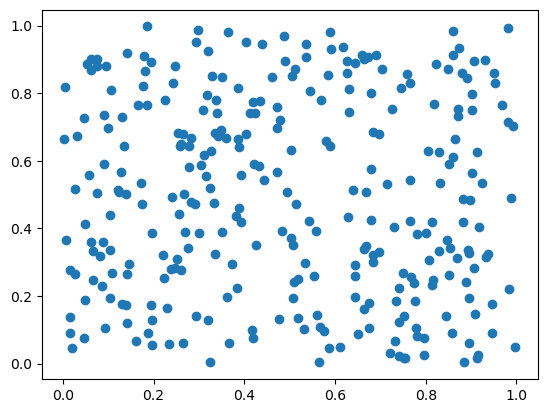

In [3]:
plt.scatter(X,Y)

In [10]:
h = 100**(-1/5) * np.vstack([X,Y]).var(axis = 1)**0.5
h

array([0.11242345, 0.11242345])

In [16]:
kern_nn = KernelJones2D_nonnegative(np.vstack([X,Y]))

Computing normalization constants


In [69]:
xx, yy = np.meshgrid(np.linspace(0,1,500), np.linspace(0,1,500))

In [17]:
res_nn = kern_nn(np.array([xx.flatten(), yy.flatten()]))

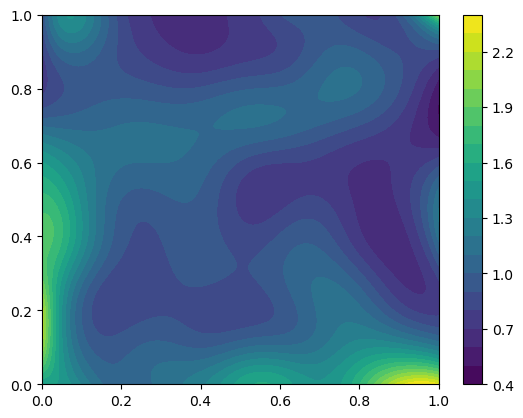

In [18]:
z_nn = res_nn.copy()
z_nn = np.reshape(z_nn, (500,500))
plt.contourf(xx, yy, z_nn, levels=20)
plt.colorbar()

In [19]:
Hxy = - (z_nn  * np.log(z_nn)).mean()
Hx = (z_nn.mean(axis = 0) * np.log(z_nn.mean(axis = 0))).mean()
Hy = (z_nn.mean(axis = 1) * np.log(z_nn.mean(axis = 1))).mean()

Hx + Hy - Hxy

# 0.02985301897471753
# 0.04713341320621767

0.04713341320621767

# Not non-negative

In [70]:
kern = KernelJones2D(np.vstack([X,Y]))

In [71]:
res = kern(np.array([xx.flatten(), yy.flatten()]))

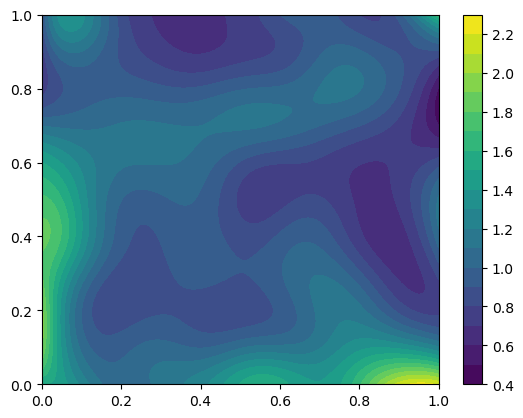

In [72]:
z = res.copy()
z = np.reshape(z, (500,500))
plt.contourf(xx, yy, z, levels = 20)
plt.colorbar()

In [25]:
z.max(), z.min()

(2.235263472388769, 0.4385163743783911)

In [13]:
z.sum() * 1/1000**2

1.0005865319510334

# kernel 1D

In [3]:
kern = KernelJones1D(X, boundary="lower")

In [4]:
h = n**(-1/5) * X.var()**0.5
h

NameError: name 'n' is not defined

59.85722787983467


(0.7700161310260323, 3.6679420246795803e-09)

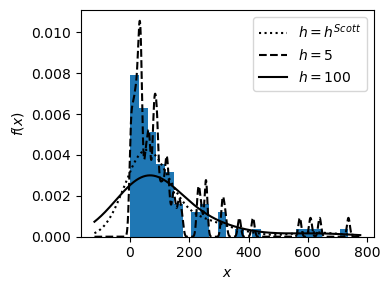

In [5]:
xx = np.linspace(-120,X.max()+40,10000)

dx = xx[1] - xx[0]

n = X.__len__()


fig, ax = plt.subplots(1,1, figsize = (4,3))
ax.hist(X,density = True,bins = 25)

h = n**(-1/5) * X.var()**0.5
print(h)
kde = gaussian_kde(X, h / X.var()**0.5)
ax.plot(xx,kde(xx), label=r"$h = h^{Scott}$",color = "black", linestyle="dotted")
# h = 0.05434782608695652


h = 5
kde = gaussian_kde(X, h / X.var()**0.5)
ax.plot(xx,kde(xx), label=r"$h = $" + f"{h}",color = "black", linestyle="--")
# plt.plot(xx,kern(xx))

h = 100
kde = gaussian_kde(X, h / X.var()**0.5)
ax.plot(xx,kde(xx), label=r"$h = $" + f"{h}",color = "black", linestyle="-")


ax.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f\left(x\right)$")
fig.tight_layout()


# plt.savefig(figures_path + "MI estimation/suicide data example.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/suicide data example.png", bbox_inches='tight')


# plt.scatter(X,np.random.random(X.shape) * kern(X), color = 'r', marker = "*", s = 5)

scipy.integrate.quad(lambda x : kde(x), 0, np.inf)

59.85722787983467


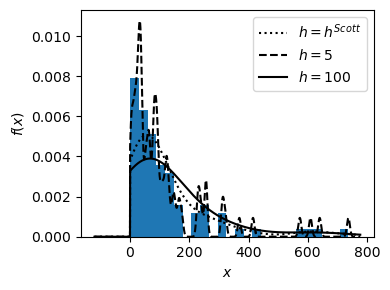

In [6]:
xx = np.linspace(-120,X.max()+40,10000)

dx = xx[1] - xx[0]

n = X.__len__()


fig, ax = plt.subplots(1,1, figsize = (4,3))
ax.hist(X,density = True,bins = 25)

h = n**(-1/5) * X.var()**0.5
print(h)
kde = gaussian_kde(X, h / X.var()**0.5)
c = scipy.integrate.quad(lambda x : kde(x), 0, np.inf)[0]
ax.plot(xx,kde(xx) / c * (xx > 0), label=r"$h = h^{Scott}$",color = "black", linestyle="dotted")
# h = 0.05434782608695652


h = 5
kde = gaussian_kde(X, h / X.var()**0.5)
c = scipy.integrate.quad(lambda x : kde(x), 0, np.inf, limit = 200)[0]
ax.plot(xx,kde(xx)/c * (xx > 0), label=r"$h = $" + f"{h}",color = "black", linestyle="--")
# plt.plot(xx,kern(xx))

h = 100
kde = gaussian_kde(X, h / X.var()**0.5)
c = scipy.integrate.quad(lambda x : kde(x), 0, np.inf)[0]
ax.plot(xx,kde(xx)/c * (xx > 0), label=r"$h = $" + f"{h}",color = "black", linestyle="-")


ax.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f\left(x\right)$")
fig.tight_layout()


# plt.savefig(figures_path + "MI estimation/suicide data example - rescaled.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/suicide data example - rescaled.png", bbox_inches='tight')


# plt.scatter(X,np.random.random(X.shape) * kern(X), color = 'r', marker = "*", s = 5)



# Reflection

59.85722787983467


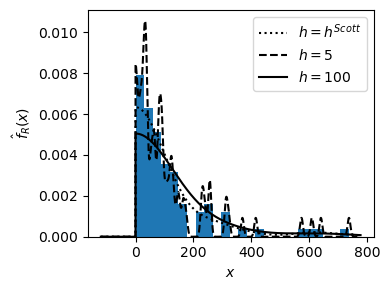

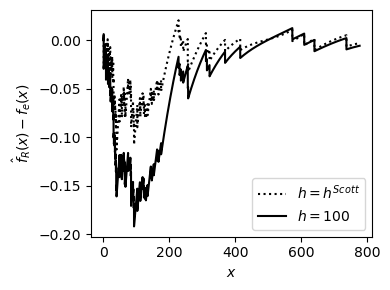

In [71]:
# reflection
xx = np.linspace(-120,X.max()+40,10000)

dx = xx[1] - xx[0]

n = X.__len__()


fig, ax = plt.subplots(1,1, figsize = (4,3))
ax.hist(X,density = True,bins = 25)

h = n**(-1/5) * X.var()**0.5
print(h)
kde_scott = gaussian_kde(X, h / X.var()**0.5)
kde_scott_R = lambda x : ( kde_scott(x) + kde_scott(-x) ) * (x >= 0)
ax.plot(xx,kde_scott_R(xx), label=r"$h = h^{Scott}$",color = "black", linestyle="dotted")
# h = 0.05434782608695652


h = 5
kde_5 = gaussian_kde(X, h / X.var()**0.5)
kde_5_R = lambda x : (kde_5(x) + kde_5(-x)) * (x >= 0)
ax.plot(xx,kde_5_R(xx), label=r"$h = $" + f"{h}",color = "black", linestyle="--")
# plt.plot(xx,kern(xx))



h = 100
kde_100 = gaussian_kde(X, h / X.var()**0.5)
kde_100_R = lambda x : ( kde_100(x) + kde_100(-x) ) * (x >= 0)
ax.plot(xx, kde_100_R(xx), label=r"$h = $" + f"{h}",color = "black", linestyle="-")


ax.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\hat{f}_R\left(x\right)$")
fig.tight_layout()


# plt.savefig(figures_path + "MI estimation/suicide data example - reflection.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/suicide data example - reflection.png", bbox_inches='tight')


# plt.scatter(X,np.random.random(X.shape) * kern(X), color = 'r', marker = "*", s = 5)


fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.plot(xx, kde_scott(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "reflection")
# ax.plot(xx, (kern(xx) * (xx >= 0)).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "Jones 1993")
xx = np.linspace(0,X.max()+40,10000); dx = xx[1] - xx[0]
ax.plot(xx, kde_scott_R(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = r"$h=h^{Scott}$",color = "black", linestyle="dotted")
ax.plot(xx, kde_100_R(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = r"$h = 100$",color = "black", linestyle="-")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\hat{f}_R\left(x\right) - f_e \left(x\right)$")
plt.legend()
fig.tight_layout()

# plt.savefig(figures_path + "MI estimation/suicide data example - reflection - Kolmogorov Smirnov.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/suicide data example - reflection - Kolmogorov Smirnov.png", bbox_inches='tight')

In [73]:
D_N_scott = np.abs(kde_scott_R(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx)).max()
D_N_100 = np.abs(kde_100_R(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx)).max()
D_N_5 = np.abs(kde_5_R(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx)).max()

print(D_N_5, D_N_scott, D_N_100)

0.029041914802347468 0.11262345184538838 0.1919388987545727


In [74]:
print( ((X.__len__()**0.5) + 0.12 + 0.11/X.__len__()**0.5) * D_N_scott )
print( ((X.__len__()**0.5) + 0.12 + 0.11/X.__len__()**0.5) * D_N_100 )
print( ((X.__len__()**0.5) + 0.12 + 0.11/X.__len__()**0.5) * D_N_5 )

1.0592776351868354
1.8052774927572464
0.27315315175529187


# Jones correction - not non-negative

In [34]:
kde_Jonas = KernelJones1D(X, boundary="lower")
kde_Jonas_nn = KernelJones1D_nonnegative(X, boundary="lower")
kde_Jonas_nn_reg = KernelJones1D_nonnegative(X, boundary="lower",lambda_=0.001)

59.85722787983467


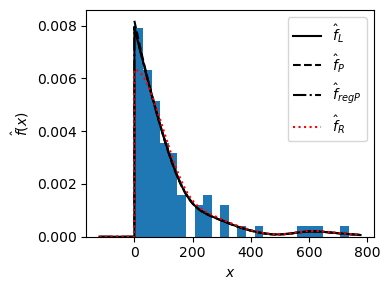

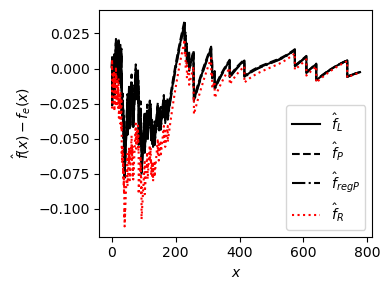

In [27]:
# reflection
xx = np.linspace(-120,X.max()+40,10000)

dx = xx[1] - xx[0]

n = X.__len__()


fig, ax = plt.subplots(1,1, figsize = (4,3))
ax.hist(X,density = True,bins = 25)

h = n**(-1/5) * X.var()**0.5
print(h)
# kde_scott = gaussian_kde(X, h / X.var()**0.5)
# kde_scott_R = lambda x : ( kde_scott(x) + kde_scott(-x) ) * (x >= 0)
ax.plot(xx,kde_Jonas(xx), label=r"$\hat{f}_L$",color = "black", linestyle="-")
# h = 0.05434782608695652

ax.plot(xx,kde_Jonas_nn(xx), label=r"$\hat{f}_P$",color = "black", linestyle="--")
ax.plot(xx,kde_Jonas_nn_reg(xx), label=r"$\hat{f}_{regP}$",color = "black", linestyle="-.")


kde_scott = gaussian_kde(X, h / X.var()**0.5)
kde_scott_R = lambda x : ( kde_scott(x) + kde_scott(-x) ) * (x >= 0)
ax.plot(xx,kde_scott_R(xx), label=r"$\hat{f}_R$",color = "red", linestyle="dotted")

ax.legend()
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\hat{f}\left(x\right)$")
fig.tight_layout()


# plt.savefig(figures_path + "MI estimation/suicide data example - Jones1993.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/suicide data example - Jones1993.png", bbox_inches='tight')


# plt.scatter(X,np.random.random(X.shape) * kern(X), color = 'r', marker = "*", s = 5)


fig, ax = plt.subplots(1,1, figsize = (4,3))
# ax.plot(xx, kde_scott(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "reflection")
# ax.plot(xx, (kern(xx) * (xx >= 0)).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "Jones 1993")
xx = np.linspace(0,X.max()+40,10000); dx = xx[1] - xx[0]

ax.plot(xx, kde_Jonas(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = r"$\hat{f}_L$",color = "black", linestyle="-")
ax.plot(xx, kde_Jonas_nn(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = r"$\hat{f}_P$",color = "black", linestyle="--")
ax.plot(xx, kde_Jonas_nn_reg(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = r"$\hat{f}_{regP}$",color = "black", linestyle="-.")

ax.plot(xx, kde_scott_R(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = r"$\hat{f}_R$",color = "red", linestyle="dotted")


ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$\hat{f}\left(x\right) - f_e \left(x\right)$")
plt.legend()
fig.tight_layout()

# plt.savefig(figures_path + "MI estimation/suicide data example - Jones1993 - Kolmogorov Smirnov.pdf", bbox_inches='tight')
# plt.savefig(figures_path + "MI estimation/suicide data example - Jones1993 - Kolmogorov Smirnov.png", bbox_inches='tight')

In [41]:
xx = np.linspace(0,X.max()+100000,10000)

In [42]:
kde_Jonas_nn_reg(xx)

array([0.00796209, 0.00749258, 0.00703435, ..., 0.        , 0.        ,
       0.        ])

In [43]:
kde_Jonas_nn(xx)

array([0.0081829 , 0.00766912, 0.00717155, ...,        nan,        nan,
              nan])

# Other

(array([0.0078204 , 0.00497662, 0.00284378, 0.00094793, 0.00094793,
        0.00071095, 0.00071095, 0.00023698, 0.00023698, 0.        ,
        0.        , 0.00023698, 0.00023698, 0.00023698, 0.00023698]),
 array([  1.        ,  50.06666667,  99.13333333, 148.2       ,
        197.26666667, 246.33333333, 295.4       , 344.46666667,
        393.53333333, 442.6       , 491.66666667, 540.73333333,
        589.8       , 638.86666667, 687.93333333, 737.        ]),
 <BarContainer object of 15 artists>)

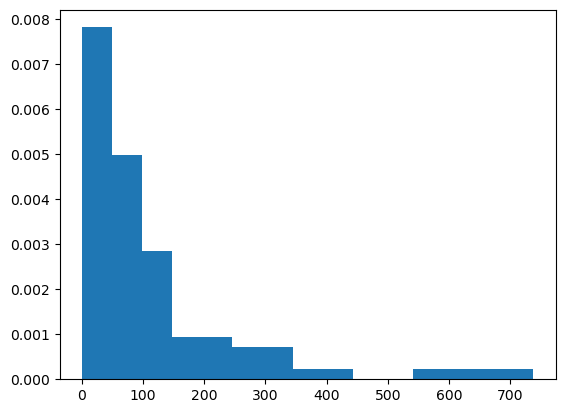

In [62]:
plt.hist(X, 15, density = True)

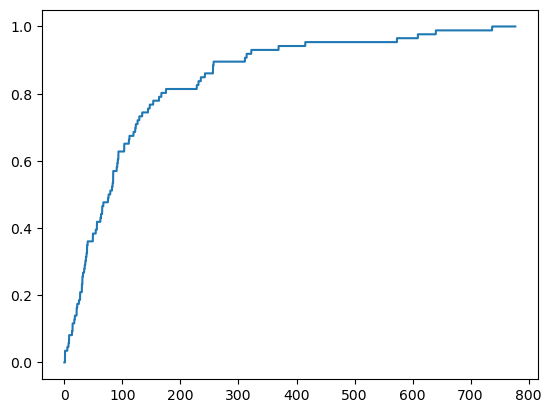

In [61]:
plt.plot(xx,scipy.stats.ecdf(X).cdf.evaluate(xx))

In [55]:
kern(xx).mean()

1.0000018770836023

In [66]:
temp = kern(xx)
(temp[1:] + temp[:-1]).mean() / 2

1.0000000019863542

In [61]:
c = scipy.integrate.quad(kde, 0,1)

kde_n = lambda x : kde(x) / c[0]
scipy.integrate.quad(kde_n, 0,1)

(0.9999999999999998, 2.331384584518259e-09)

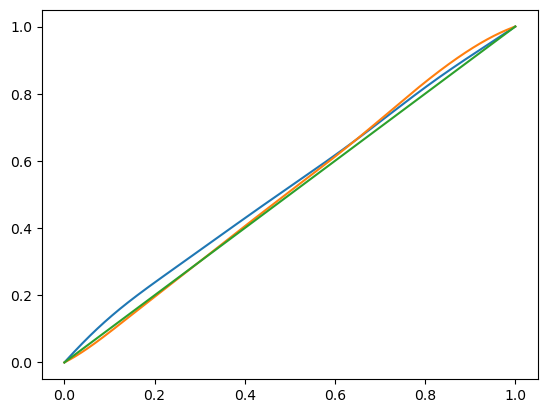

In [62]:
plt.plot(xx, kern(xx).cumsum() * dx)
plt.plot(xx, kde_n(xx).cumsum() * dx)
plt.plot(xx,xx)

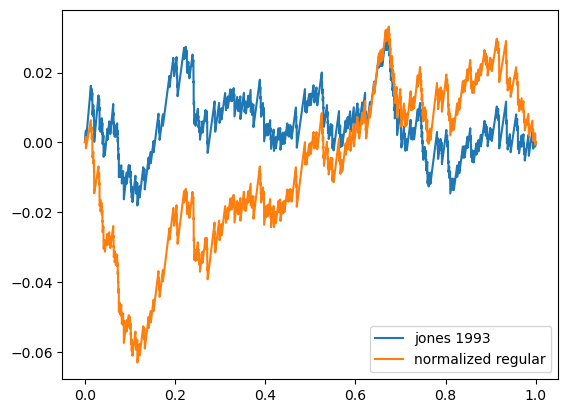

In [65]:
plt.plot(xx, kern(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "jones 1993")
plt.plot(xx, kde_n(xx).cumsum() * dx - scipy.stats.ecdf(X).cdf.evaluate(xx), label = "normalized regular")
plt.legend()